<a href="https://colab.research.google.com/github/rzqmhb/machine-learning-ti3f/blob/main/Minggu%2011%20-%20Convolutional%20Neural%20Network/11_Roziq%20Mahbubi_CNN/CNN_tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tugas

##Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

###Langkah 1 - Load Library

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

###Langkah 2 - Unduh Dataset CIFAR

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 4s 0us/step


###Langkah 3 - Verifikasi Data

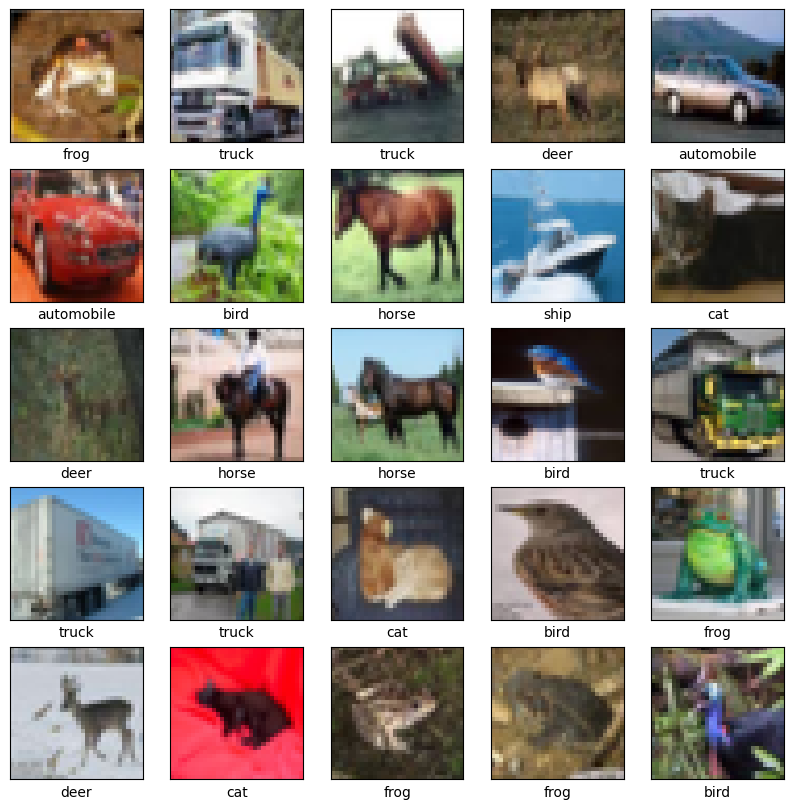

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

###Langkah 4 - Buat Model CNN

####Langkah 4.1. - Buat Layer Konvolusi

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

####Langkah 4.2. - Cek Arsitektur Konvolusi

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_8 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_9 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                      

####Langkah 4.3. - Tambahkan Layer Fully Connected

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))

####Langkah 4.4. - Cek Arsitektur Model CNN

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_8 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_9 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                      

####Langkah 4.5. - Compile Model CNN

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

###Langkah 5 - Fit Model

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 21s 11ms/step - loss: 1.6056 - accuracy: 0.4444 - val_loss: 1.1133 - val_accuracy: 0.6020
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0563 - accuracy: 0.6280 - val_loss: 0.8642 - val_accuracy: 0.6923
Epoch 3/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.8802 - accuracy: 0.6949 - val_loss: 0.7943 - val_accuracy: 0.7222
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7738 - accuracy: 0.7331 - val_loss: 0.6956 - val_accuracy: 0.7541
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6988 - accuracy: 0.7601 - val_loss: 0.6260 - val_accuracy: 0.7876
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6448 - accuracy: 0.7791 - val_loss: 0.6706 - val_accuracy: 0.7737
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.5980 - accuracy: 0.7973 - val_loss: 0.5839 -

###Langkah 6 - Evaluasi Model

313/313 - 1s - loss: 0.5753 - accuracy: 0.8103 - 1s/epoch - 4ms/step


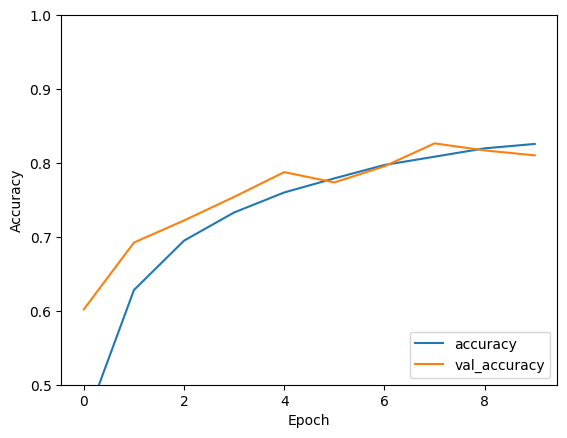

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

###Langkah 7 - Cetak Hasil Akurasi

In [ ]:
print(test_acc)

0.8102999925613403


##Buatlah model CNN untuk klasifikasi dataset MNIST.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(len(y_train))
print(X_test.shape)
print(len(y_test))

(60000, 28, 28)
60000
(10000, 28, 28)
10000


In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0 # normalisasi data citra menjadi citra  biner

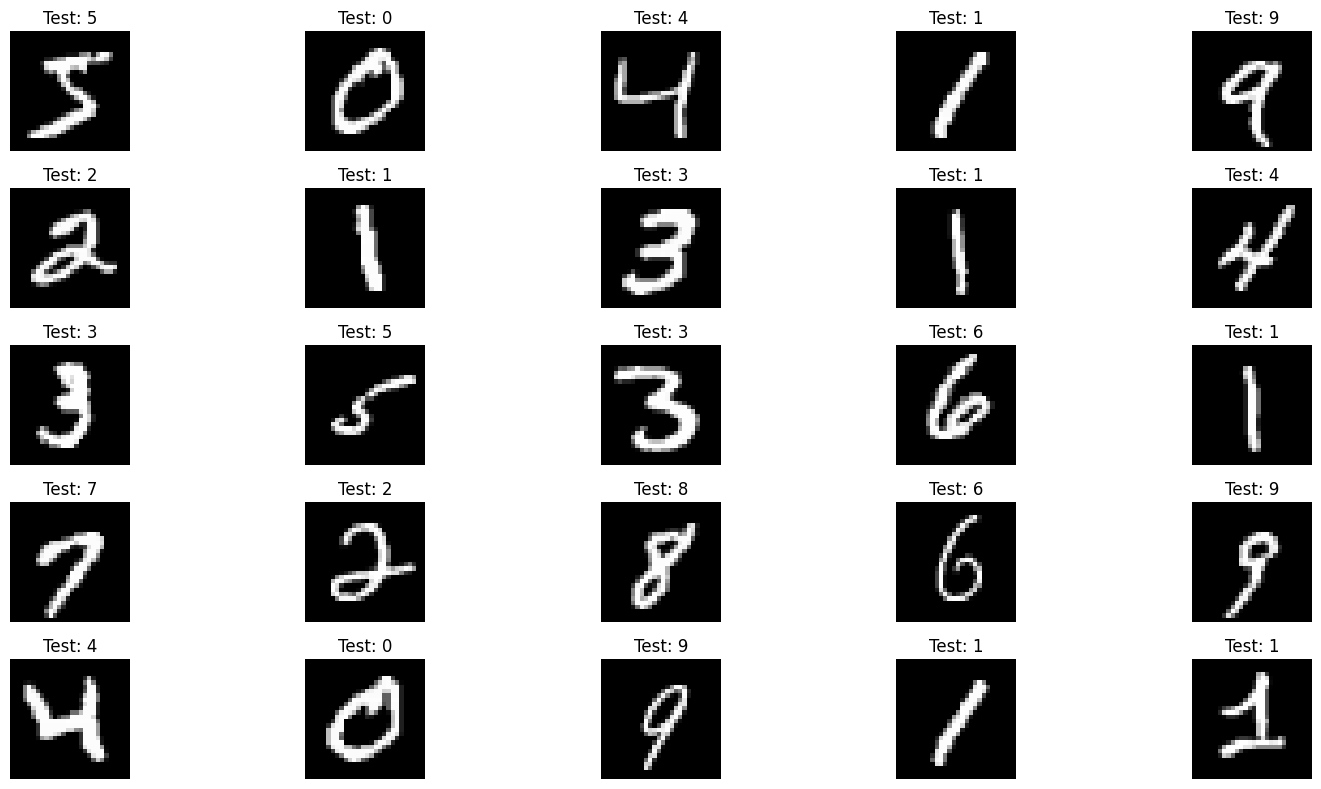

In [ ]:
n_images = 25

sample_images = X_train[:n_images]
sample_labels = y_train[:n_images]

plt.figure(figsize=(16, 8))
for i in range(n_images):
    plt.subplot(5, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')

    plt.title(f"Test: {sample_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 18s 7ms/step - loss: 0.1515 - accuracy: 0.9540 - val_loss: 0.0551 - val_accuracy: 0.9814
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0701 - accuracy: 0.9783 - val_loss: 0.0372 - val_accuracy: 0.9876
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0532 - accuracy: 0.9839 - val_loss: 0.0284 - val_accuracy: 0.9910
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0449 - accuracy: 0.9859 - val_loss: 0.0209 - val_accuracy: 0.9934
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0422 - accuracy: 0.9870 - val_loss: 0.0185 - val_accuracy: 0.9944
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0363 - accuracy: 0.9888 - val_loss: 0.0211 - val_accuracy: 0.9932
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0312 - accuracy: 0.9903 - val_loss: 0.0172 - val_ac

313/313 - 1s - loss: 0.0168 - accuracy: 0.9951 - 1s/epoch - 3ms/step


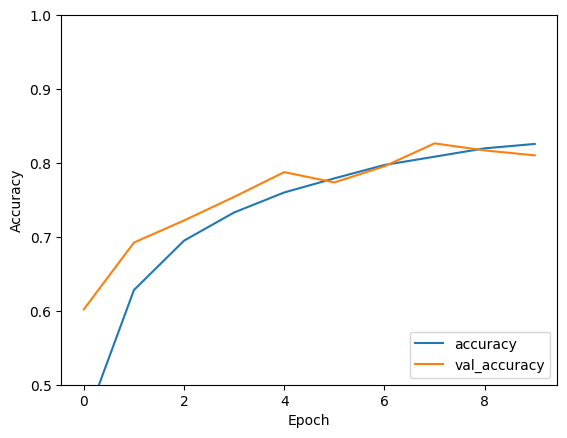

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

In [ ]:
print(test_acc)

0.9951000213623047


In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=1)

313/313 [==============================] - 1s 2ms/step


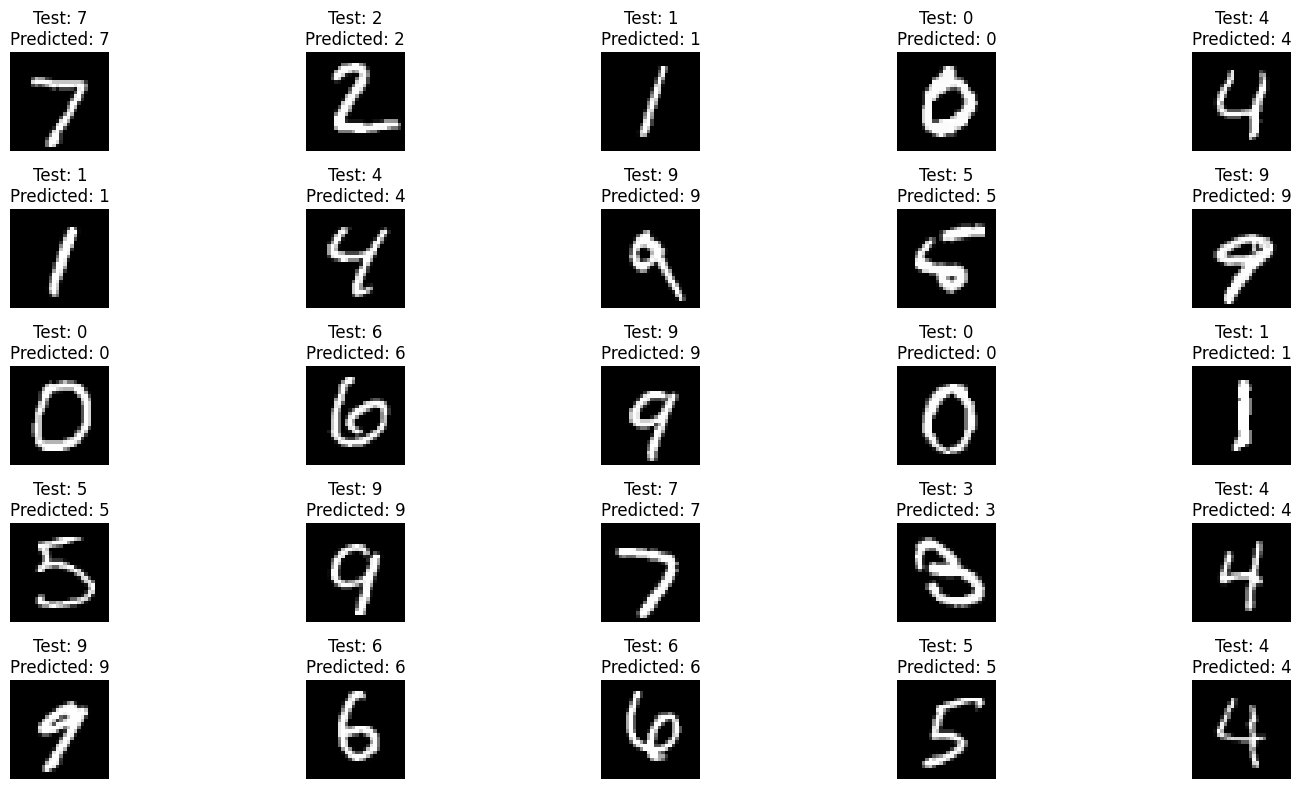

In [ ]:
n_images = 25

sample_images = X_test[:n_images]
sample_labels = y_test[:n_images]

plt.figure(figsize=(16, 8))
for i in range(n_images):
    plt.subplot(5, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')

    plt.title(f"Test: {sample_labels[i]}\nPredicted: {y_pred[i]}",
              color='black'
              if sample_labels[i] == y_pred[i]
              else 'red')
    plt.axis('off')

plt.tight_layout()
plt.show()